# TUMOR - CNR - TOWARD HISTOGRAM ANALYSIS - CC1 SUBJECT



Created: 2021.11.09 / Updated: 2021.12.02

ver. 0.02

- standarize ROI colors in images and histograms

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

import os
import pathlib
import glob

import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt

In [3]:
import utils
import functions1 as f1

# GLOBAL VARIABLES

In [4]:
HOME_DIR = pathlib.Path(os.getcwd()).parent
DATA_DIR = HOME_DIR / 'data'
RESULTS_DIR = DATA_DIR / 'results'
PLOT_DIR = DATA_DIR / 'plots'
TABLE_DIR = DATA_DIR / 'tables'

CURRENT_NOTEBOOK_NAME = 'cnr-04-cc1'
CURRENT_NOTEBOOK_NUMBER = CURRENT_NOTEBOOK_NAME.split('-')[1]

---

# GET LIST ALL CC1 IMAGES

In [5]:
SUB = 'CC1'

In [6]:
files = list(RESULTS_DIR.glob(f"*{SUB}*.nii.gz"))
files

[PosixPath('/home/marek/Dropbox/p1ext4_P/no_work/TUMOR-CNR/tumor-cnr-git/data/results/CC1_t2_roi.nii.gz'),
 PosixPath('/home/marek/Dropbox/p1ext4_P/no_work/TUMOR-CNR/tumor-cnr-git/data/results/CC1_t2_roi_dilated_ball2.nii.gz'),
 PosixPath('/home/marek/Dropbox/p1ext4_P/no_work/TUMOR-CNR/tumor-cnr-git/data/results/CC1_t2_roi_dilated2.nii.gz'),
 PosixPath('/home/marek/Dropbox/p1ext4_P/no_work/TUMOR-CNR/tumor-cnr-git/data/results/CC1_t2_roi_dilated_ball3.nii.gz'),
 PosixPath('/home/marek/Dropbox/p1ext4_P/no_work/TUMOR-CNR/tumor-cnr-git/data/results/CC1_t2_roi_dilated_ball5.nii.gz'),
 PosixPath('/home/marek/Dropbox/p1ext4_P/no_work/TUMOR-CNR/tumor-cnr-git/data/results/CC1_t2_roi_dilated1.nii.gz'),
 PosixPath('/home/marek/Dropbox/p1ext4_P/no_work/TUMOR-CNR/tumor-cnr-git/data/results/CC1_t2_bladder.nii.gz'),
 PosixPath('/home/marek/Dropbox/p1ext4_P/no_work/TUMOR-CNR/tumor-cnr-git/data/results/CC1_t2.nii.gz'),
 PosixPath('/home/marek/Dropbox/p1ext4_P/no_work/TUMOR-CNR/tumor-cnr-git/data/result

In [7]:
# print only names
_ = [print(f'{k+1}) {f.name}') for k, f in enumerate(sorted(files))]

1) CC1_t2.nii.gz
2) CC1_t2_bladder.nii.gz
3) CC1_t2_roi.nii.gz
4) CC1_t2_roi_cm.nii.gz
5) CC1_t2_roi_dilated1.nii.gz
6) CC1_t2_roi_dilated2.nii.gz
7) CC1_t2_roi_dilated_ball2.nii.gz
8) CC1_t2_roi_dilated_ball3.nii.gz
9) CC1_t2_roi_dilated_ball5.nii.gz


## LOAD ALL IMAGES

In [8]:
# nii structure
nii = nib.load(RESULTS_DIR / 'CC1_t2.nii.gz')
# image
img = nii.get_fdata()
# roi
roi = nib.load(RESULTS_DIR / 'CC1_t2_roi.nii.gz').get_fdata()
# dilated 1
dil1 = nib.load(RESULTS_DIR / 'CC1_t2_roi_dilated1.nii.gz').get_fdata()
# dilated 2
dil2 = nib.load(RESULTS_DIR / 'CC1_t2_roi_dilated2.nii.gz').get_fdata()
# ball2
bal2 = nib.load(RESULTS_DIR / 'CC1_t2_roi_dilated_ball2.nii.gz').get_fdata()
# ball3
bal3 = nib.load(RESULTS_DIR / 'CC1_t2_roi_dilated_ball3.nii.gz').get_fdata()
# ball5
bal5 = nib.load(RESULTS_DIR / 'CC1_t2_roi_dilated_ball5.nii.gz').get_fdata()
# bladder
blad = nib.load(RESULTS_DIR / 'CC1_t2_bladder.nii.gz').get_fdata()

### CREATE LIST OFLOADED IMAGES AND LIST OF THEIR NAMES

In [9]:
masks = [dil1, dil2, bal2, bal3, bal5]
names = ['dil1', 'dil2', 'bal2', 'bal3', 'bal5']

# only dil and bal images; neither img nor roi
MASKS_CNT = len(masks)

### BASIC INFO ABOUT IMAGES

In [10]:
f1.im_info(img, 'img')
f1.im_info(roi, 'roi')
f1.im_info(blad, 'bladder')
print()
for i,n in zip(masks, names):
    f1.im_info(i,name=n)

*** IMG ***,	max=988.0, min=0.0, mean=252.81, shape=(320, 320, 25), #voxels=2560000
*** ROI ***,	max=1.0, min=0.0, mean=0.00, shape=(320, 320, 25), #voxels=2560000
*** BLADDER ***,	max=1.0, min=0.0, mean=0.00, shape=(320, 320, 25), #voxels=2560000

*** DIL1 ***,	max=1.0, min=0.0, mean=0.01, shape=(320, 320, 25), #voxels=2560000
*** DIL2 ***,	max=1.0, min=0.0, mean=0.01, shape=(320, 320, 25), #voxels=2560000
*** BAL2 ***,	max=1.0, min=0.0, mean=0.01, shape=(320, 320, 25), #voxels=2560000
*** BAL3 ***,	max=1.0, min=0.0, mean=0.01, shape=(320, 320, 25), #voxels=2560000
*** BAL5 ***,	max=1.0, min=0.0, mean=0.02, shape=(320, 320, 25), #voxels=2560000


### DISPLAY ALL MASKS OVERLAYED ON IMAGE AND ROI FOR SELECTED SLICE

In [11]:
#%matplotlib notebook

Figure saved to:
	/home/marek/Dropbox/p1ext4_P/no_work/TUMOR-CNR/tumor-cnr-git/data/plots/04-CC1-roi-and-dilated-masks.png


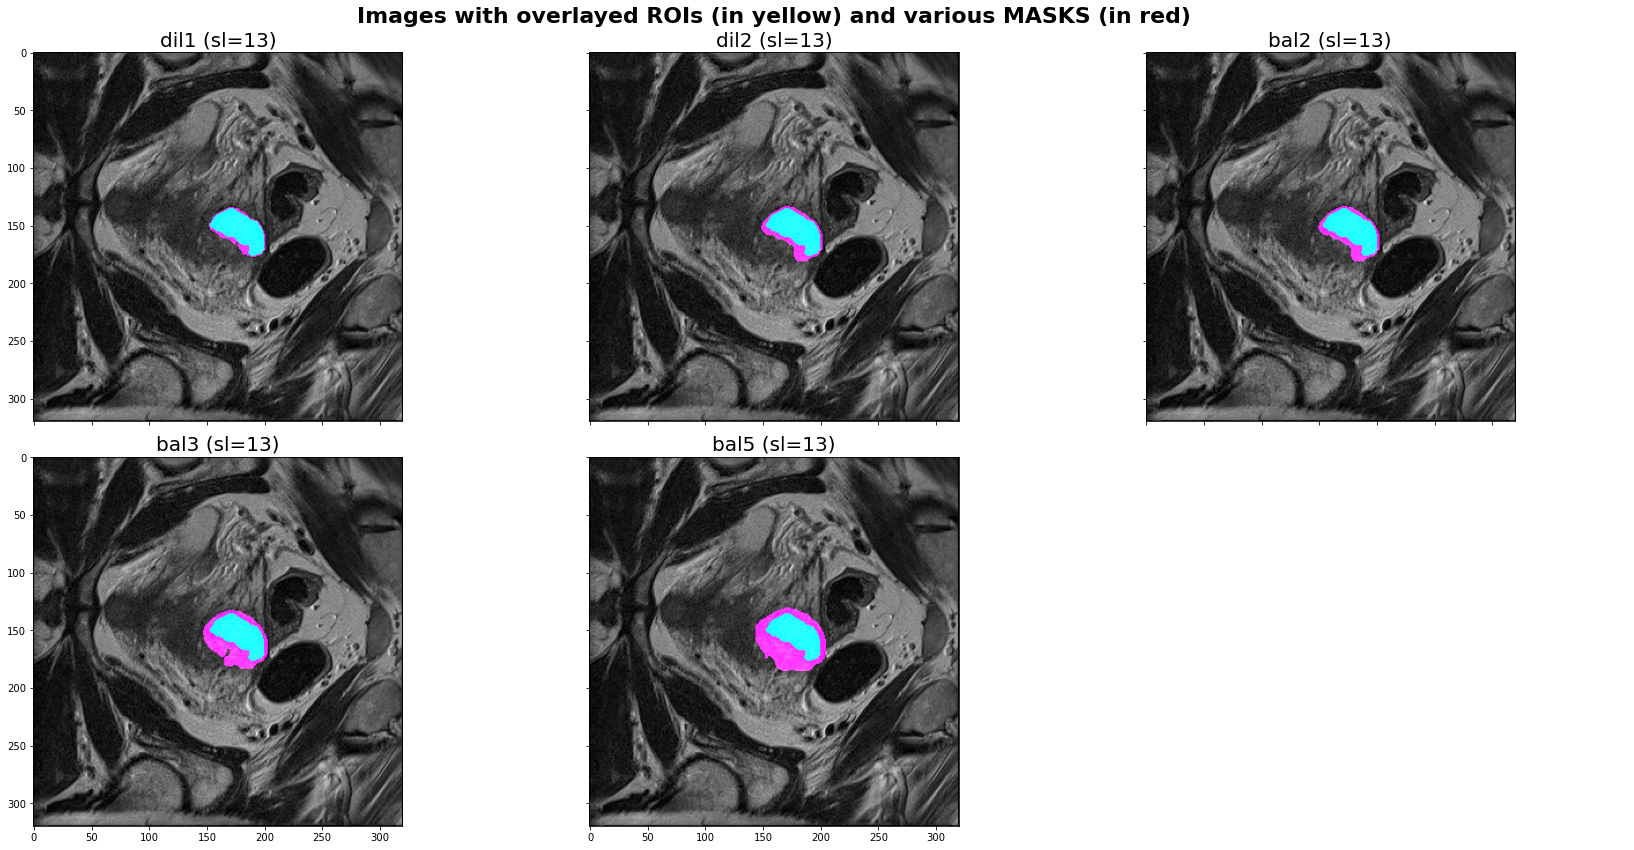

In [12]:
f,ax = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(24,12))

title = 'Images with overlayed ROIs (in yellow) and various MASKS (in red)'
f1.show_images_from_list2(ax, img, roi, masks_lst=masks, names_lst=names, slice_nr=13, title=title, fontsize=22)
f.tight_layout()

save_name = PLOT_DIR / f'{CURRENT_NOTEBOOK_NUMBER}-{SUB}-roi-and-dilated-masks.png' 
print(f'Figure saved to:\n\t{save_name}')
plt.savefig(save_name)

plt.show()   

# PLOT HISTOGRAMS FOR ALL MASKS

In [13]:
# plt.figure(figsize=(22,12))
# plt.imshow(mask_of_rim[:,:,14])

#plt.savefig(

Saved figure:
	../data/plots/04-CC1-dil1.png


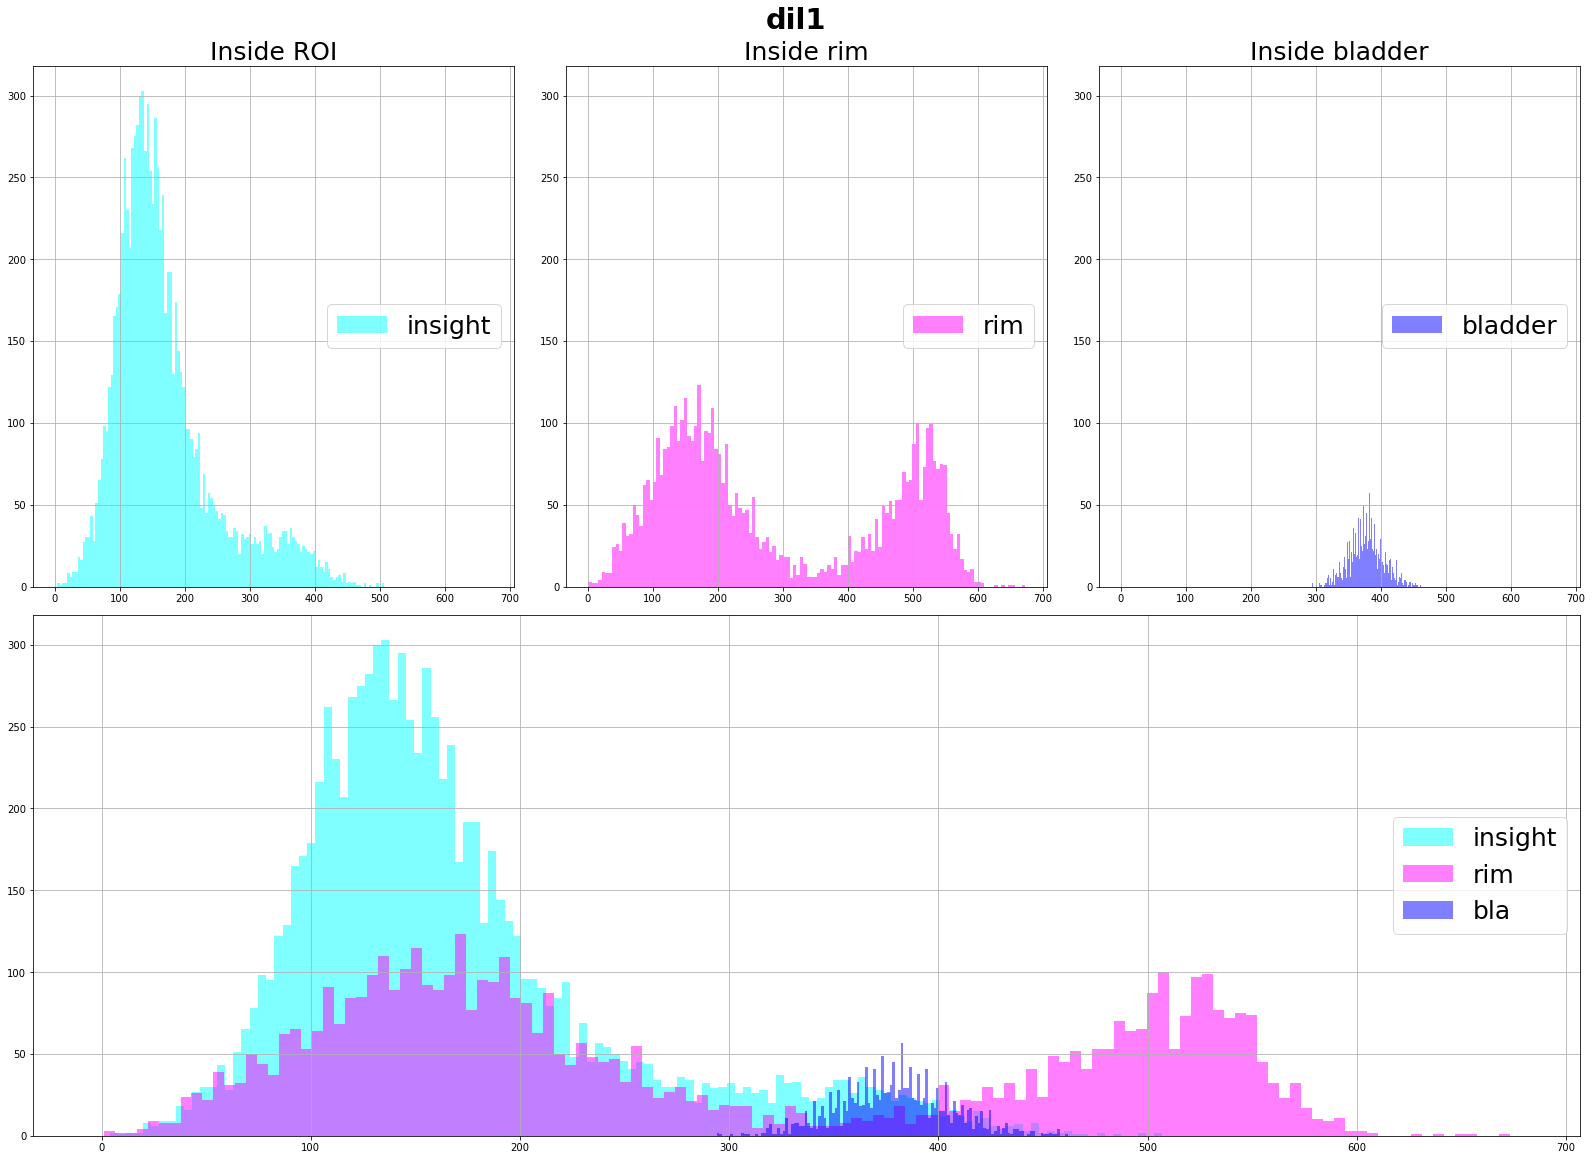

********************************************************************************
Saved figure:
	../data/plots/04-CC1-dil2.png


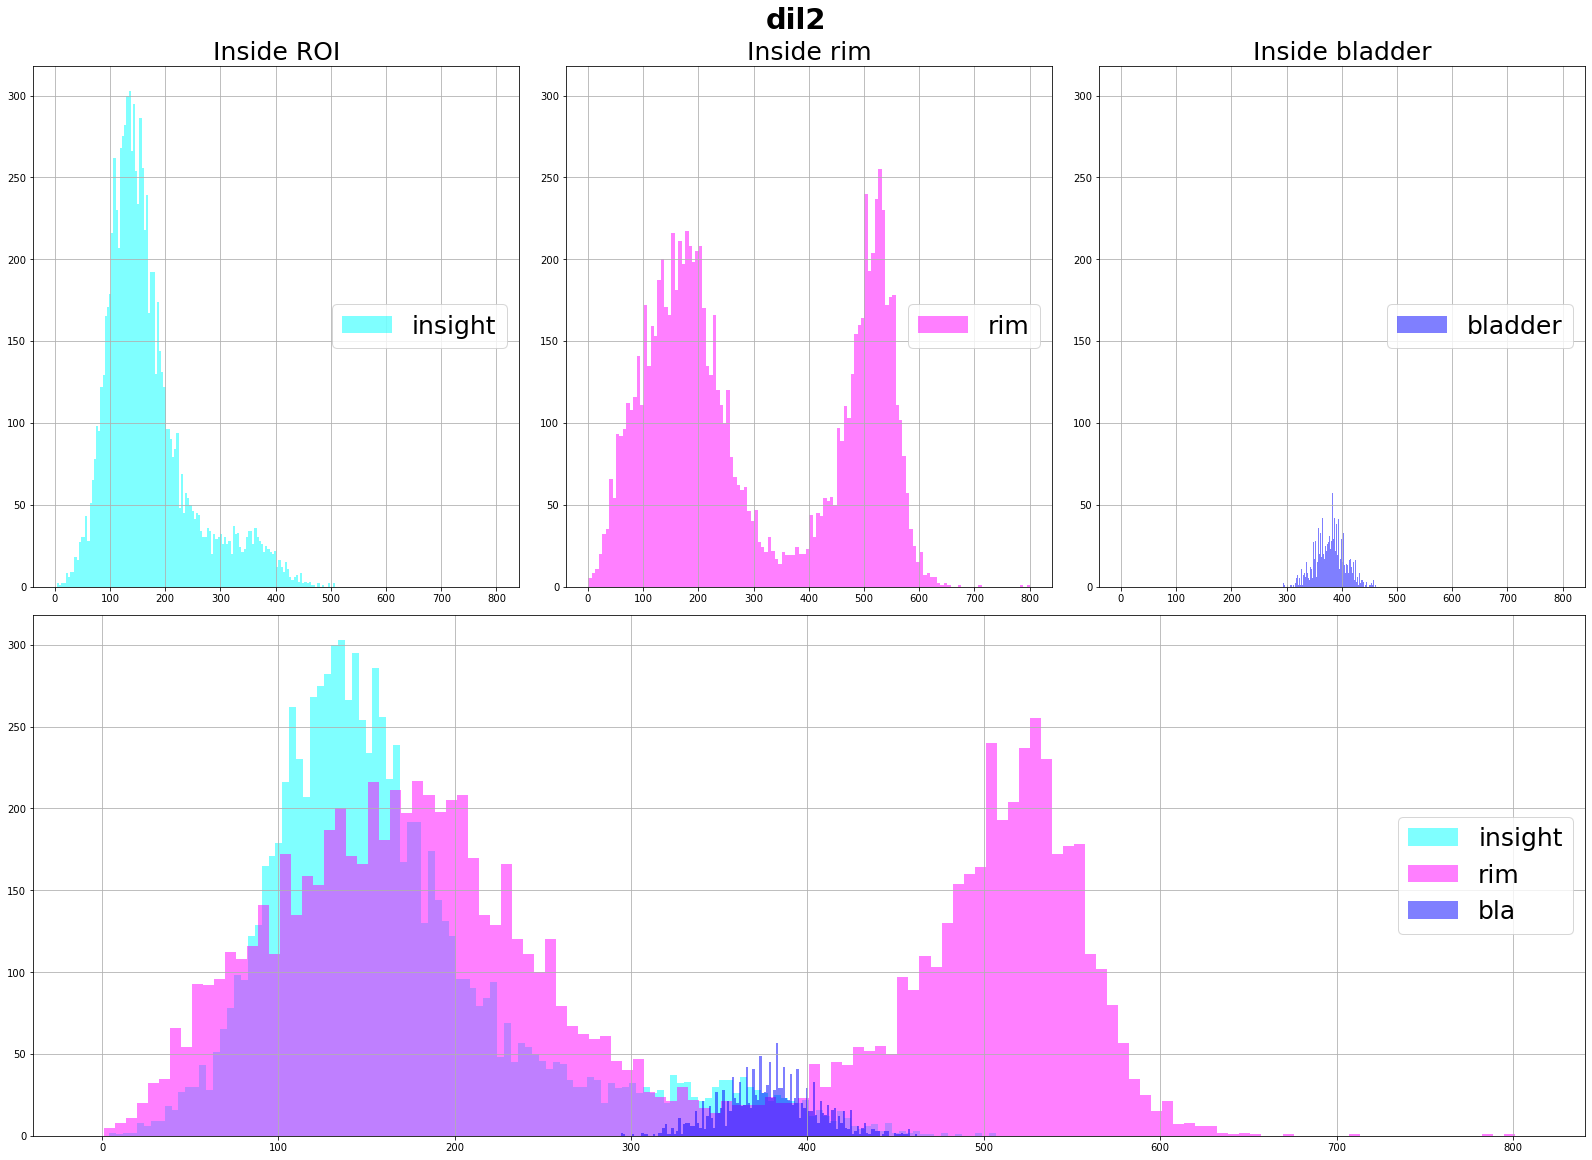

********************************************************************************
Saved figure:
	../data/plots/04-CC1-bal2.png


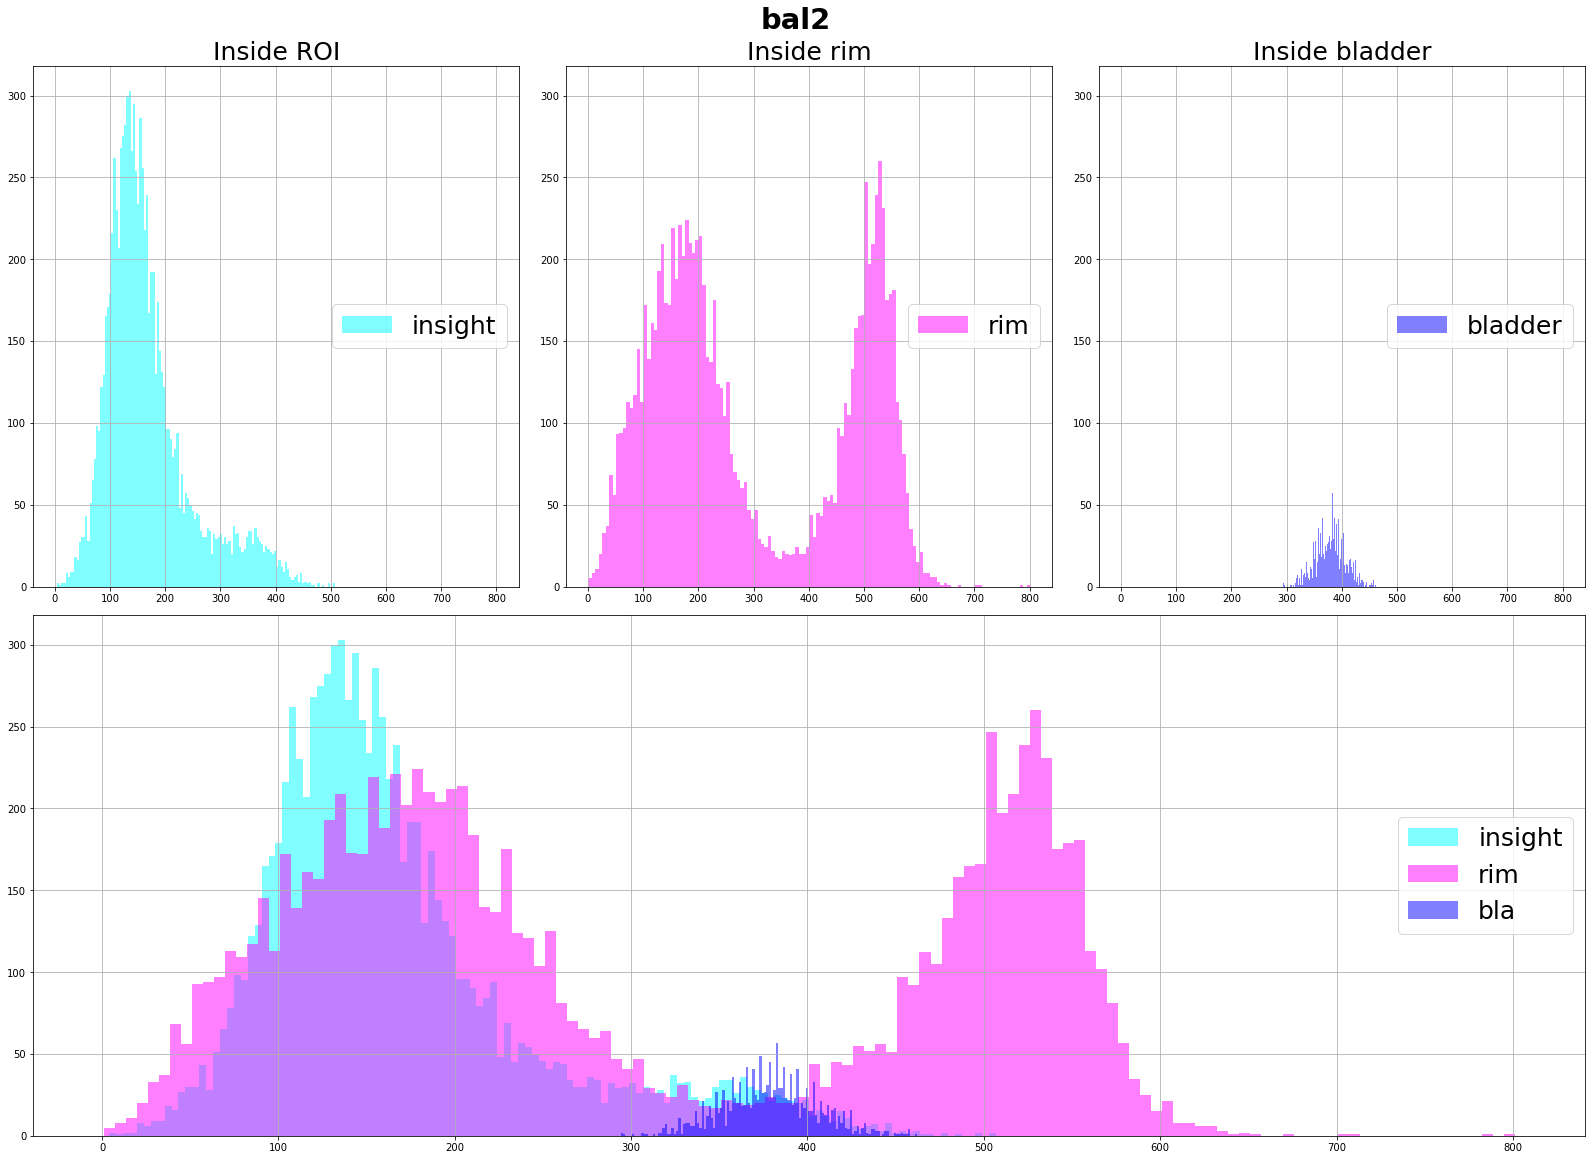

********************************************************************************
Saved figure:
	../data/plots/04-CC1-bal3.png


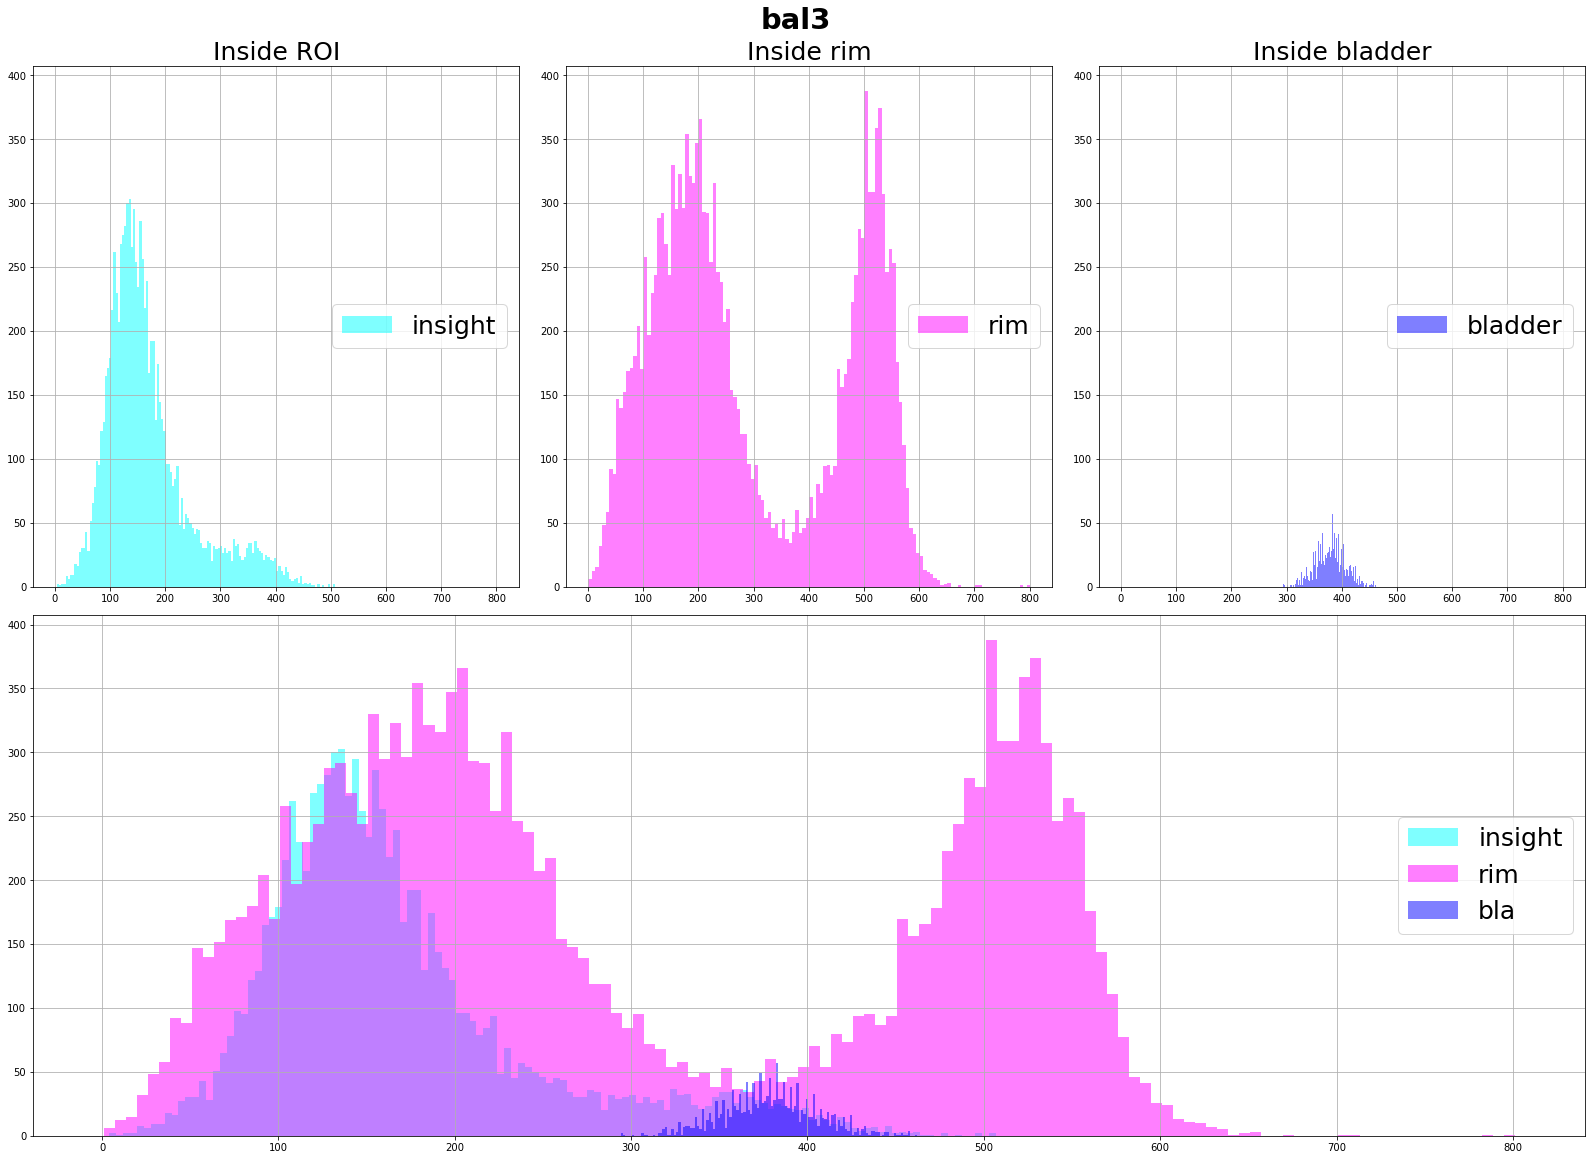

********************************************************************************
Saved figure:
	../data/plots/04-CC1-bal5.png


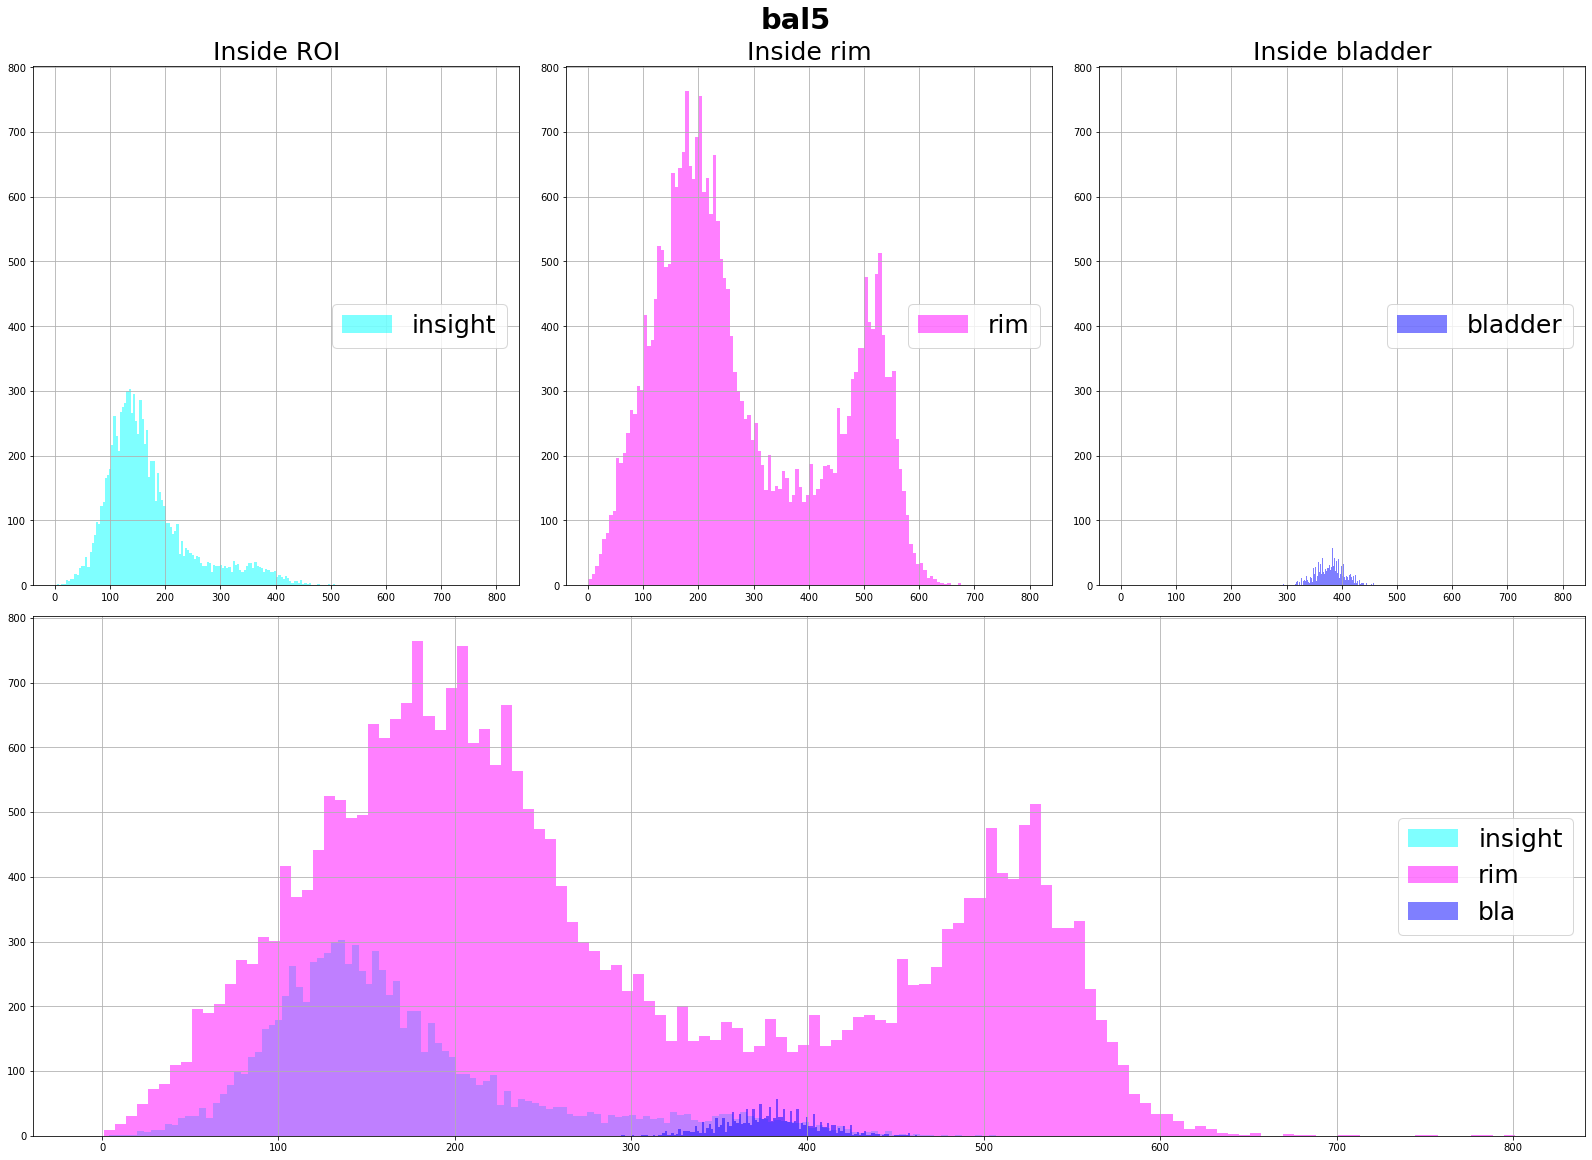

********************************************************************************


In [14]:
# voxels inside ROI only (fullsize)
voxels_inside_roi = np.where(roi, img, 0)
voxels_inside_bladder = np.where(blad, img, 0)

for mask, name in zip(masks, names):    
    mask_of_rim = mask - roi
    voxels_inside_rim = np.where(mask_of_rim, img, 0)
        
    f1.plot_3_histograms_separately(voxels_inside_roi, voxels_inside_rim, voxels_inside_bladder, legendloc=7, title=name,sub=SUB, save=True, 
                                    notebook_nr=CURRENT_NOTEBOOK_NUMBER)
    print(80*'*')

---

# ******************************* TEST CODE ******************************************

# CUMULATIVE HISTOGRAM

To compare brightness within various subjects ROIs we normalize all images. We clip some part (e.g. 2%) of the brightness and the darkness voxels wighin the image. As image brightness distribution might not fullfill normal distribution, to assess clipping values we use culultative brightness histogram.

In [15]:
aa = img[img>0]
f1.im_info(aa)

*** IMAGE ***,	max=988.0, min=1.0, mean=254.84, shape=(2539683,), #voxels=2539683


In [16]:
# create the same number of bins as the brighter voxel's value
hist, bins = np.histogram(aa, bins=int(aa.max().round()))

# middle point of bins, to display as X axis
bins2 = (bins[1:] - bins[0:-1])/2 * np.array(range(len(bins)-1))

### HISTOGRAM & CUMULATIVE HISTOGRAM

21 25955
514 2464914 256.7398785425139


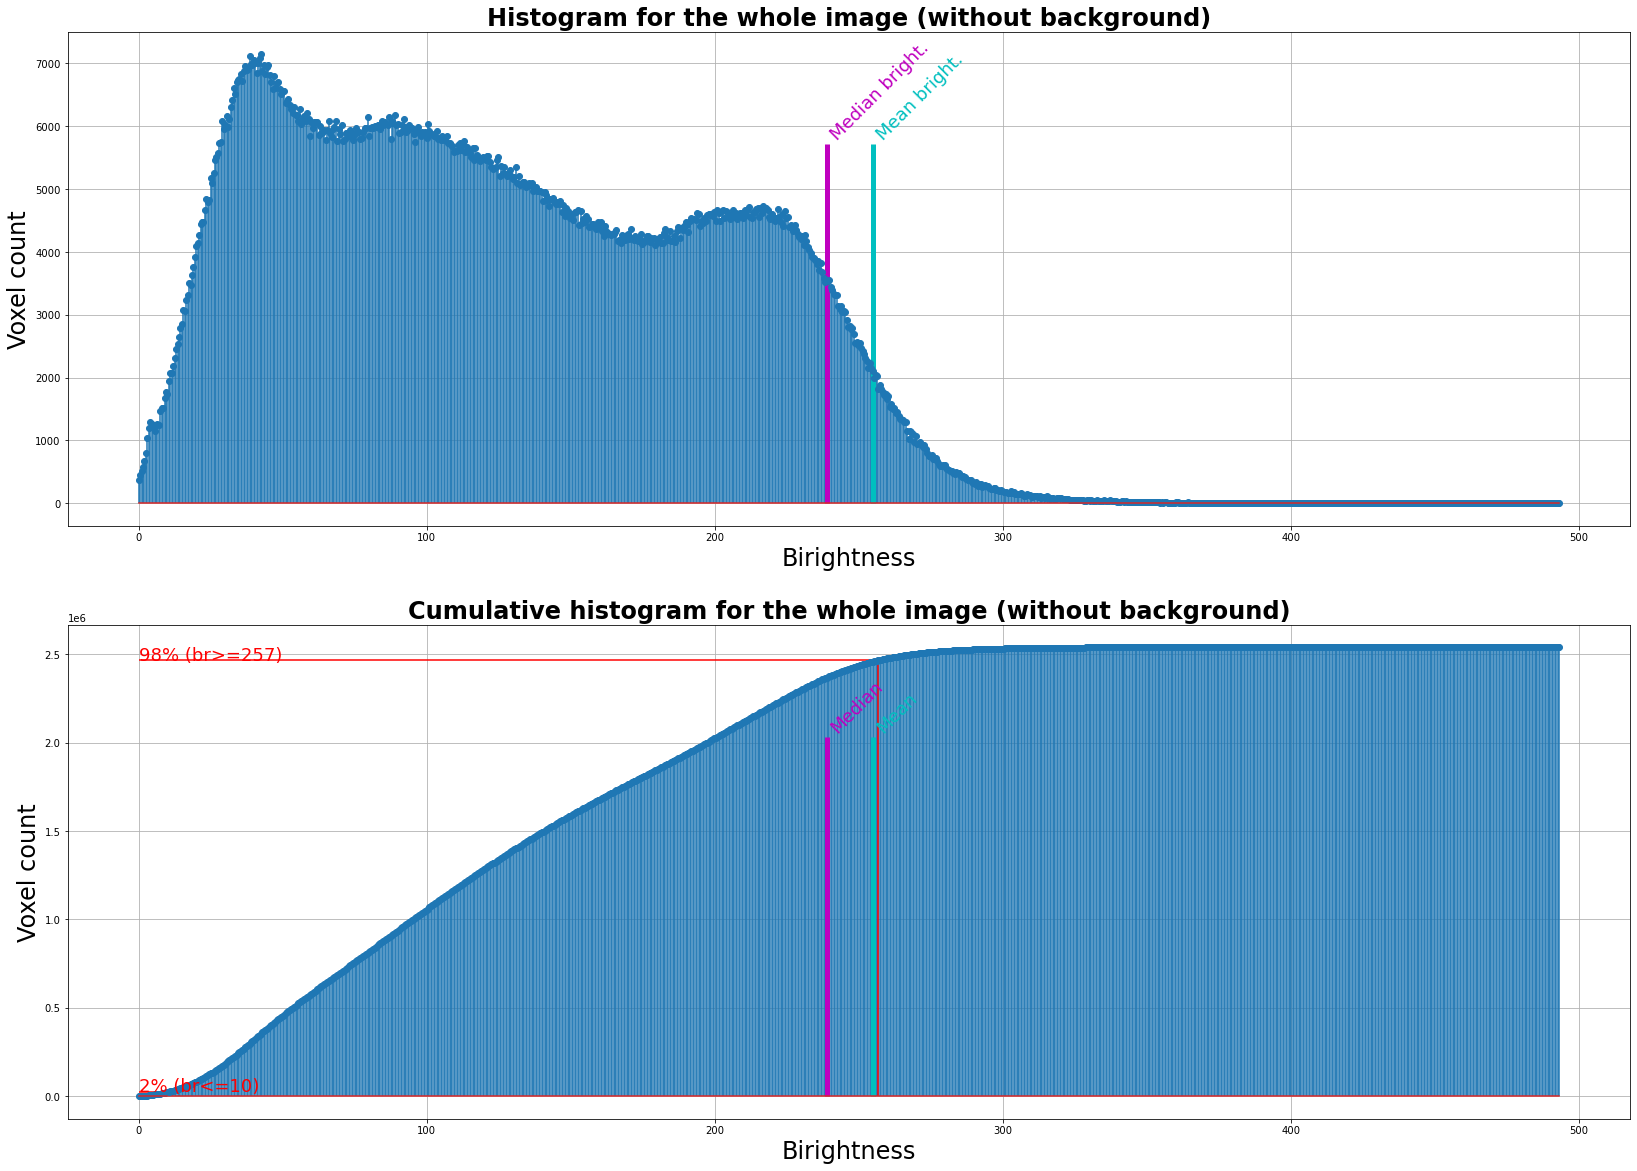

In [17]:
plt.figure(figsize=(28,20))

#del idx_mn, idx_mx

# histogram 
plt.subplot(211)
plt.grid(True)
plt.stem(bins2, hist)
plt.title('Histogram for the whole image (without background)', fontsize=24, fontweight='bold')
plt.xlabel('Birightness', fontsize=24)
_ = plt.ylabel('Voxel count', fontsize=24)


# mean
h0 = hist.max() * 0.8
h1 = hist.max() * 0.81

plt.vlines(aa.mean(),0, h0,colors='c', label='Mean', linewidth=5)
plt.text(aa.mean(), h1, s='Mean bright.', fontsize=18, rotation=45, color='c')
# median
plt.vlines(np.median(aa),0,h0,colors='m', label='Median', linewidth=5,)
_= plt.text(np.median(aa), h1, s='Median bright.', fontsize=18, color='m', rotation=45)

# cumulative histogram
plt.subplot(212)

cum_hist = np.add.accumulate(hist)
mx = cum_hist.max()
prec_to_rem = 2
prec_bottom = prec_to_rem
prec_top = 100 - prec_to_rem
tol = 0.01 # of maximum value

for i, hist_val in enumerate(cum_hist):    
    if np.abs(hist_val - mx*prec_bottom/100) <= np.round(mx*tol):
        idx_mn = i
        print(i, cum_hist[i])
        break        
for i, hist_val in enumerate(cum_hist):
    if np.abs(hist_val - mx*prec_top/100) <= np.round(mx*tol):
        idx_mx = i
        print(i, cum_hist[i], bins2[i])
        break
        
plt.grid(True)
plt.stem(bins2, cum_hist)
plt.title('Cumulative histogram for the whole image (without background)', fontsize=24, fontweight='bold')
plt.xlabel('Birightness', fontsize=24)
_ = plt.ylabel('Voxel count', fontsize=24)


g0 = cum_hist.max() * 0.8
g1 = cum_hist.max() * 0.81

# mean
plt.vlines(aa.mean(),0, g0, colors='c', label='Mean', linewidth=5)
plt.text(aa.mean(), g1, s='Mean', fontsize=18, rotation=45, color='c')
# median
plt.vlines(np.median(aa),0,g0,colors='m', label='Median', linewidth=5,)
_= plt.text(np.median(aa), g1, s='Median', fontsize=18, color='m', rotation=45)

plt.stem(bins2[idx_mx], cum_hist[idx_mx], 'r')
plt.stem(bins2[idx_mn], cum_hist[idx_mn], 'r')

plt.hlines(cum_hist[idx_mx], 0, bins2[idx_mx], colors='r')
plt.text(0, cum_hist[idx_mx], f'{prec_top}% (br>={bins2[idx_mx]:.0f})', fontsize=18, color='r')

plt.hlines(cum_hist[idx_mn], 0, bins2[idx_mn], colors='r')
_= plt.text(0, cum_hist[idx_mn], f'{prec_bottom}% (br<={bins2[idx_mn]:.0f})', fontsize=18, color='r')

In [18]:
#%matplotlib qt

In [19]:
#aa[aa>=257].shape

In [20]:
#aa.shape

---

In [21]:
# rgba - PROBY Z PRZEZROCZYSTAOSCIA, W CELU NALOZENIA 

# import scipy.misc as misc

# a = misc.face()
# print(a.shape)
# print(type(a))
# print(a.dtype)
# print(f1.im_info(a))

# b = np.zeros((768, 1024,4), dtype=np.uint8)
# b[:,:,:3] = a
# b[:,:,-1] = 125
# print(b.shape)
# f1.im_info(b)

# plt.imshow(b)

# ********************************** END OF TEST CODE *********************************

---

# VISUALIZATION

In [22]:
import vtk
import itk
import itkwidgets
from itkwidgets import view
from vtk.util.numpy_support import vtk_to_numpy, numpy_to_vtk

# VTK

This library is used to display loaded objects as based on their geometries for the following images and structures:
1. img
2. roi
3. ball5

To load the Nifti images we use reader implemented in VTK library.

In [23]:
reader = vtk.vtkNIFTIImageReader()
reader.SetFileName(str(RESULTS_DIR / 'CC1_t2.nii.gz'))
reader.Update()
img_vtk = reader.GetOutput()

In [24]:
reader = vtk.vtkNIFTIImageReader()
reader.SetFileName(str(RESULTS_DIR / 'CC1_t2_roi.nii.gz'))
reader.Update()
roi_vtk = reader.GetOutput()

In [25]:
reader = vtk.vtkNIFTIImageReader()
reader.SetFileName(str(RESULTS_DIR / 'CC1_t2_roi_dilated_ball5.nii.gz'))
reader.Update()
ball5_vtk = reader.GetOutput()

In [26]:
reader = vtk.vtkNIFTIImageReader()
reader.SetFileName(str(RESULTS_DIR / 'CC1_t2_bladder.nii.gz'))
reader.Update()
blad_vtk = reader.GetOutput()

In [27]:
def convertVtkImageDataToNumpy(image):
	r,c,s = image.GetDimensions()
	sc = image.GetPointData().GetScalars()

	array  = vtk_to_numpy(sc)
	array=array.reshape(r,c,s,order='F')
	return array

In [28]:
def convertNumpyArrayToVtkImage(array,origin=[0.0,0.0,0.0],spacing=[1.0,1.0,1.0]):
	vtkimage = numpy_to_vtk(array.flatten('F'),deep=True, array_type=vtk.VTK_UNSIGNED_SHORT)
	image1 = vtk.vtkImageData() 
	image1.GetPointData().SetScalars(vtkimage)
	image1.SetDimensions(array.shape)
	image1.SetOrigin(origin)
	image1.SetSpacing(spacing)
	return image1

In [29]:
def getVtkImageInfo(image,name='VTK image'):
	print(50*'*')
	s = "*** " + name + " ***"
	print(s)
	print(len(s)*'*')
	dataDimension = image.GetDataDimension()
	print("* dataDimension = ", dataDimension)
	voxelType = image.GetScalarTypeAsString()
	print('* voxelType = ', voxelType)
	origin = image.GetOrigin()
	print('* origin = ', origin)
	spacing = image.GetSpacing()
	print('* spacing = ', spacing)
	dimensions = image.GetDimensions()
	print('* dimensions = ', dimensions)	
	extent = image.GetExtent()
	print('* extent = ', extent)
	bounds = image.GetBounds()
	print('* bounds = ', bounds)
	numberOfPoints = image.GetNumberOfPoints()
	print('* numberOfPoints =', numberOfPoints)
	length = image.GetLength()
	print('* length = ', length)
	print(50*'*')

In [30]:
roi_np = convertVtkImageDataToNumpy(roi_vtk)
#rescalle intensity
ball5_np = convertVtkImageDataToNumpy(ball5_vtk)
blad_np = convertVtkImageDataToNumpy(blad_vtk) * 3

f1.im_info(roi_np, 'roi_np')
f1.im_info(ball5_np, 'ball5_np')
f1.im_info(blad_np, 'bladder')

*** ROI_NP ***,	max=1, min=0, mean=0.00, shape=(320, 320, 25), #voxels=2560000
*** BALL5_NP ***,	max=1, min=0, mean=0.02, shape=(320, 320, 25), #voxels=2560000
*** BLADDER ***,	max=3, min=0, mean=0.00, shape=(320, 320, 25), #voxels=2560000


In [31]:
roi_np2vtk = convertNumpyArrayToVtkImage(roi_np)
roi_np2vtk.SetSpacing(img_vtk.GetSpacing())

ball5_np2vtk = convertNumpyArrayToVtkImage(ball5_np)
ball5_np2vtk.SetSpacing(img_vtk.GetSpacing())

blad_np2vtk = convertNumpyArrayToVtkImage(blad_np)
blad_np2vtk.SetSpacing(img_vtk.GetSpacing())

In [32]:
getVtkImageInfo(img_vtk)

**************************************************
*** VTK image ***
*****************
* dataDimension =  3
* voxelType =  short
* origin =  (0.0, 0.0, 0.0)
* spacing =  (0.5625, 0.5625, 3.0)
* dimensions =  (320, 320, 25)
* extent =  (0, 319, 0, 319, 0, 24)
* bounds =  (0.0, 179.4375, 0.0, 179.4375, 0.0, 72.0)
* numberOfPoints = 2560000
* length =  263.77951552859446
**************************************************


In [33]:
mc = vtk.vtkDiscreteMarchingCubes()
mc.SetInputData(roi_np2vtk)
mc.GenerateValues(1,1,1)
mc.Update()

In [34]:
mc_ball5 = vtk.vtkDiscreteMarchingCubes()
mc_ball5.SetInputData(ball5_np2vtk)
mc_ball5.GenerateValues(1,1,1)
mc_ball5.Update()

In [35]:
mc_blad = vtk.vtkDiscreteMarchingCubes()
mc_blad.SetInputData(blad_np2vtk)
mc_blad.GenerateValues(1,3,3)
mc_blad.Update()

# VTK IMAGE + ROI (red surface) + BALL5 (yellow surface)

![cc1-t2-vtk-1](assets/cc1-t2-vtk-1.gif)

In [36]:
view(img_vtk, geometries=[mc_ball5.GetOutput(), mc.GetOutput(), mc_blad.GetOutput()],   geometry_opacities=[0.1, 0.4],
    geometry_colors=['red', 'green', 'green'], slicing_planes=True, blend_mode='composite')


Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

# IMAGE + BALL5  (as image) + ROI (as surface)

![CC1-t1](assets/cc1-t2-vtk-2.png)

In [37]:
view(image=img_vtk, label_image=roi_vtk, geometries=mc.GetOutput(), slicing_planes=True, blend_mode='composite',)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

## IMAGE + ROI (as image) + ROI (as surface)

![vtk3](assets/cct-t2-vtk-3.png)

In [38]:
view(image=img_vtk, label_image=roi_vtk, geometries=mc.GetOutput(), slicing_planes=True, blend_mode='composite',)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

---

# ITK

Load and process Nifti images, this loader stores orientation and roitation information.

In [39]:
# Get the voxel size
img_res, vox_size = f1.get_voxel_resolution_from_header(nii)

*** IMAGE ***
	Image resolution: [320 320  25]
	Voxel size: [0.5625 0.5625 3.    ]


In [40]:
img_itk = itk.imread(str(RESULTS_DIR / 'CC1_t2.nii.gz'))
roi_itk = itk.imread(str(RESULTS_DIR / 'CC1_t2_roi.nii.gz'))
ball5_itk = itk.imread(str(RESULTS_DIR / 'CC1_t2_roi_dilated_ball5.nii.gz'))

In [41]:
img_res = itk.RescaleIntensityImageFilter.New(ball5_itk)
img_res.SetOutputMinimum(0)
img_res.SetOutputMaximum(255)
img_res.Update()

# roi_res = itk.RescaleIntensityImageFilter.New(roi_itk)
# roi_res.SetOutputMinimum(0)
# roi_res.SetOutputMaximum(255)
# roi_res.Update()

In [42]:
# stat = itk.StatisticsImageFilter.New(img_itk)
# stat.Update()
# print(stat.GetMaximum())
# print(stat.GetMinimum())
# print(stat.GetMean())

In [43]:
def CastFilter(input):
    caster = itk.CastImageFilter[itk.Image.US3, itk.Image.SS3].New()
    caster.SetInput(input)
    caster.Update()
    return caster

In [44]:
roi_ss3 = CastFilter(roi_itk)

In [45]:
roi_mask_itk = itk.MaskImageFilter.New(img_itk)
roi_mask_itk.SetMaskImage(roi_ss3)
roi_mask_itk.Update()

---

# ACCES TO IMAGE DATA AS NUMPY ARRAY

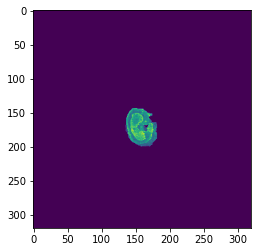

In [46]:
plt.imshow(itk.GetArrayViewFromImage(roi_mask_itk).max(0))

---

In [47]:
utils.print_date(5)

02-Dec-2021 19:18:04


In [48]:
utils.save_notebook_as_html(file_name=CURRENT_NOTEBOOK_NAME, cleaning_delay=2)

In [49]:
#utils.save_notebook_as_pdf(file_name=CURRENT_NOTEBOOK_NAME, cleaning_delay=2)